In [4]:
import os

# List the contents of the '/content/' directory
directory_contents = os.listdir('/content/')
print(directory_contents)


['.config', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_test.csv', 'american_sign_language.PNG', 'sign_mnist_train.csv', 'sample_data']


In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [13]:
# Load the CSV files containing training and testing data and labels
train_csv_path = '/content/sign_mnist_train.csv'
test_csv_path = '/content/sign_mnist_test.csv'

train_data_df = pd.read_csv(train_csv_path)
test_data_df = pd.read_csv(test_csv_path)

# Extract the labels and pixel values from the DataFrames
train_labels = train_data_df['label'].values
train_data = train_data_df.drop(columns=['label']).values

test_labels = test_data_df['label'].values
test_data = test_data_df.drop(columns=['label']).values

# Reshape the data to match the image dimensions (28x28x1 for grayscale)
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

# Normalize the pixel values to the range [0, 1]
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Convert the labels to one-hot encoded format
num_classes = 26  # 26 classes (A-Z) in the sign language dataset
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [14]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/10
773/773 [==============================] - 30s 38ms/step - loss: 0.9626 - accuracy: 0.7173 - val_loss: 0.1910 - val_accuracy: 0.9446
Epoch 2/10
773/773 [==============================] - 40s 51ms/step - loss: 0.0624 - accuracy: 0.9879 - val_loss: 0.0213 - val_accuracy: 0.9978
Epoch 3/10
773/773 [==============================] - 30s 39ms/step - loss: 0.0168 - accuracy: 0.9979 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/10
773/773 [==============================] - 28s 37ms/step - loss: 0.0222 - accuracy: 0.9941 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/10
773/773 [==============================] - 30s 39ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 7.4747e-04 - val_accuracy: 1.0000
Epoch 6/10
773/773 [==============================] - 28s 37ms/step - loss: 5.7036e-04 - accuracy: 1.0000 - val_loss: 4.2228e-04 - val_accuracy: 1.0000
Epoch 7/10
773/773 [==============================] - 28s 36ms/step - loss: 3.2969e-04 - accuracy: 1.0000 - val_loss: 3.1987

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


225/225 [==============================] - 3s 15ms/step - loss: 0.3990 - accuracy: 0.9170
Test Loss: 0.3989719748497009, Test Accuracy: 0.9170385003089905


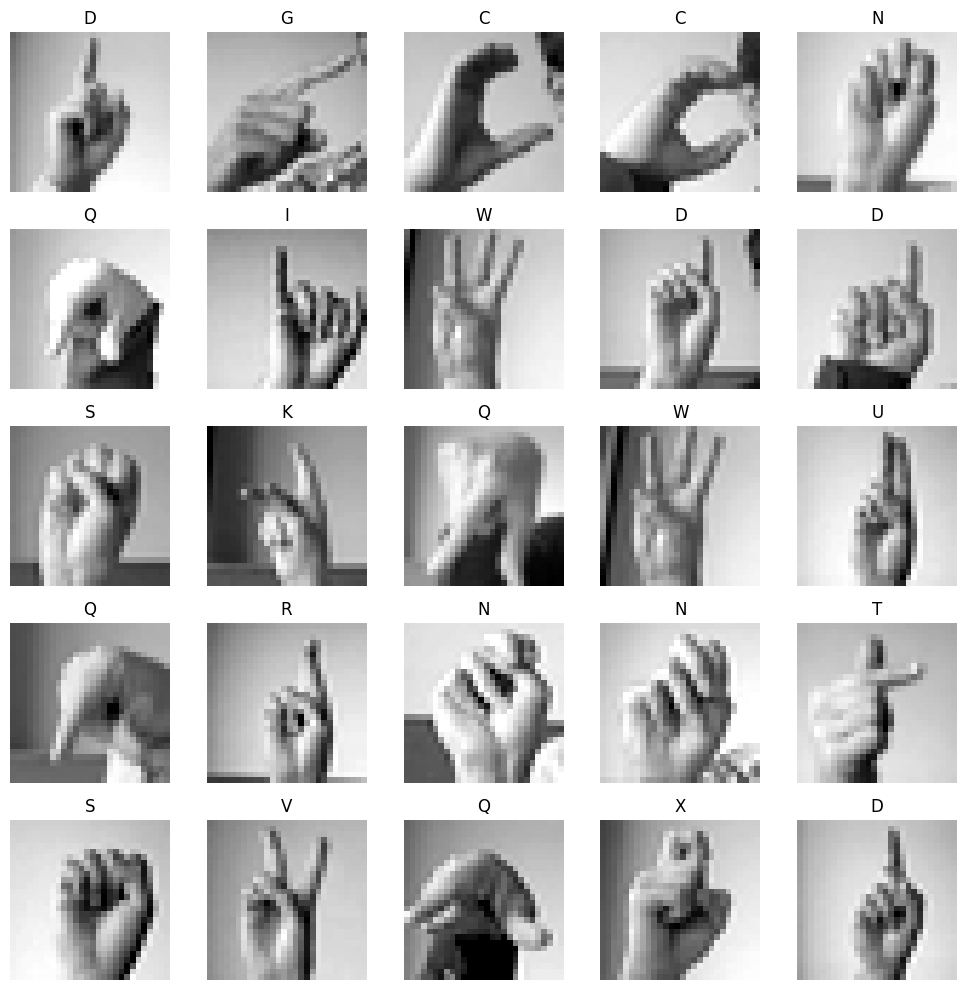

In [17]:
# Visualize sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_data[i].reshape(28, 28), cmap='gray')
    plt.title(chr(65 + np.argmax(train_labels[i])))
    plt.axis('off')
plt.tight_layout()
plt.show()


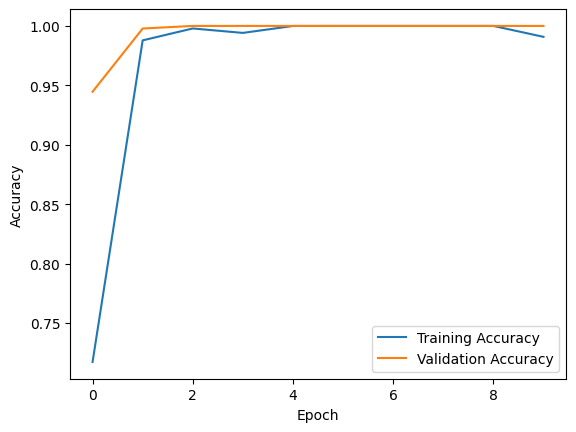

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


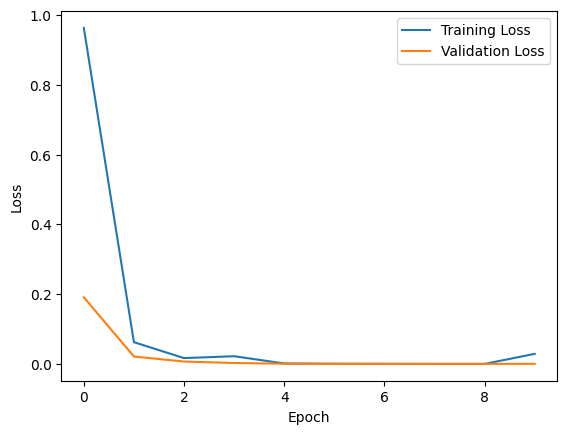

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# Print sample predictions
sample_indexes = np.random.choice(len(test_data), size=10, replace=False)
sample_images = test_data[sample_indexes]
sample_labels = test_labels[sample_indexes]

predictions = model.predict(sample_images)
predicted_labels = [chr(65 + np.argmax(pred)) for pred in predictions]

print("Sample Predictions:")
for i in range(10):
    print(f"True Label: {chr(65 + np.argmax(sample_labels[i]))}, Predicted Label: {predicted_labels[i]}")


1/1 [==============================] - 0s 133ms/step
Sample Predictions:
True Label: G, Predicted Label: G
True Label: C, Predicted Label: C
True Label: I, Predicted Label: I
True Label: K, Predicted Label: K
True Label: V, Predicted Label: V
True Label: K, Predicted Label: K
True Label: P, Predicted Label: P
True Label: E, Predicted Label: E
True Label: F, Predicted Label: F
True Label: M, Predicted Label: S
